<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

In [2]:
from __future__ import print_function

%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import warnings

# Numerical Quadrature

**Goal:** Accurately Evaluate definite integrals

$$ 
\int^b_a f(x) dx
$$

using a finite number of samples

### Why?

1. Many integrals do not have closed form solutions

$$ 
   \int^b_a \sqrt{1 + \cos^2x}~ dx
$$

### A more practical example:  The Error function

The error function:

$$ 
   \mathrm{erf}(x) = \frac{2}{\sqrt{\pi}}\int_0^x e^{-t^2} dt
$$
is related to the cumuluative probability distribution of a Gaussian.  And is useful in probability and PDE's.  But has no closed form solution.

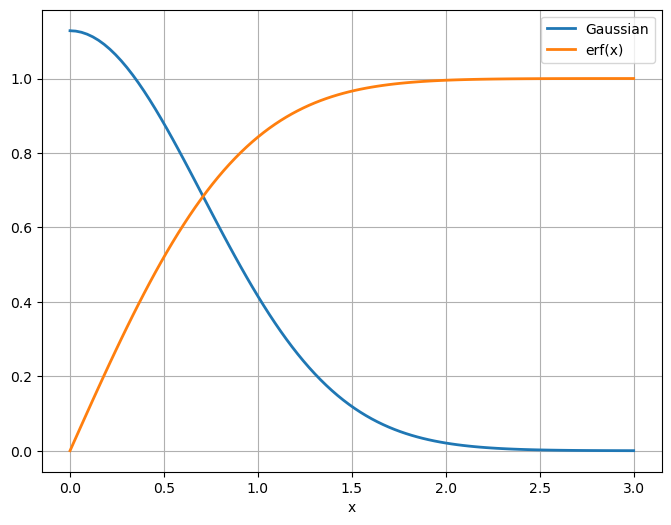

In [3]:
from scipy.special import erf
x = numpy.linspace(0.,3.,100)
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1,1,1)
axes.plot(x, 2/numpy.sqrt(numpy.pi)*numpy.exp(-x**2),label='Gaussian',linewidth=2)
axes.plot(x, erf(x),label='erf(x)',linewidth=2)
axes.grid()
axes.set_xlabel('x')
axes.legend(loc='best')
plt.show()

Solution to even simple non-linear ordinary differential equations
   
   $$\frac{\text{d} u}{\text{d}t} = f(u)g(t)$$ with initial condition $u(0)=u_0$
   
   Can always be solved by "reduction to quadrature" i.e. the solution is given implicitly by
   
   $$\int_{u_0}^{u}  \frac{dv}{f(v)} = \int_0^t g(\tau)d\tau$$
   
which are two, definite integrals that may, or may not have closed forms (but are essentially "the area under the curve")
   

Solution to ordinary differential equations
   
   $$\frac{\text{d}^2 u}{\text{d}t^2} = f\left(u, \frac{\text{d} u}{\text{d}t}, t \right)$$
   
   Defining $v = \frac{\text{d} u}{\text{d}t}$ then leads to

   $$\begin{bmatrix}
   \frac{\text{d} v}{\text{d}t} \\ \frac{\text{d} u}{\text{d}t} \end{bmatrix} = \begin{bmatrix} f(u, v, t) \\ v \end{bmatrix}$$
   
   which can be solved by integration
   
   $$\begin{bmatrix}
   v \\ u \end{bmatrix} = \begin{bmatrix} v(t_0) + \int^t_{t_0} f(u, v, \hat{t}) d\hat{t} \\ u(t_0) + \int^t_{t_0} v d\hat{t} \end{bmatrix}$$  

Solving partial differential equations such as "Poisson's equation"
$$
     \nabla^2 u = f
$$

using the finite element method, will use quadrature to reduce the PDE to a linear algebraic problem $A\mathbf{u}=\mathbf{f}$
<table>
 <tr align=center><td><img align=center src="./images/poisson_simple_gmsh.png" width=800>
</table>

Solution of poisson's equation on an irregular domain using [TerraFERMA](http://terraferma.github.io)


### Basics of Quadrature

We want to approximate an integral $I$ with some approximation $I_N$ such that
$$
    I = \int^b_a f(x) dx \approx I_N = \sum^{N}_{i=1} w_i f(x_i)
$$
where the $x_i$ are the *quadrature points* or *nodes* and the $w_i$ are the *weights*.  Usually a particular quadrature rule specifies the points $x_i$ resulting in a particular set of weights $w_i$.

Convergence requires that
$$
    \lim_{N \rightarrow \infty} I_N = I.
$$

## Riemann Sums

Given $f(x)$ and a partition of the interval $[a,b]$ with $\{x_i\}^N_{i=0}$ and $a = x_0 < x_1 < \ldots < x_N = b$ and $x^*_i \in [x_i, x_{i+1}]$ we define the Riemann integral as

$$\int^b_a f(x) dx = \lim_{N\rightarrow \infty} \sum^{N-1}_{i=0} f(x_i^*) (x_{i+1} - x_i)$$

This is a general definition and leads to a number of quadrature approaches that depend on how we pick $x_i^* \in [x_i, x_{i+1}]$.

### Midpoint Rule

Choose $x_i^*$ such that

$$x_i^* = \frac{x_{i+1} + x_i}{2}$$

so that

$$I[f] = \int^b_a f(x) dx \approx \sum^{N-1}_{i=0} f\left(\frac{x_{i+1} + x_i}{2} \right ) (x_{i+1} - x_i) = I_N[f]$$

over $\Delta x_i = x_{i+1} - x_i$ 

#### Example:  Integrate using midpoint rule

Calculate and illustrate the midpoint rule.  Note that we are computing the cummulative integral here:

$$
    \int^x_0 \sin(\hat{x}) d\hat{x} = \left . -\cos \hat{x} \right|^x_0 = 1 - \cos x
$$

In [6]:
# Note that this calculates the cumulative integral from 0.0

f = lambda x: numpy.sin(x)
I = lambda x: 1.0 - numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

num_partitions = 10
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
x_star = 0.5 * (x_hat[1:] + x_hat[:-1])
delta_x = x_hat[1] - x_hat[0]

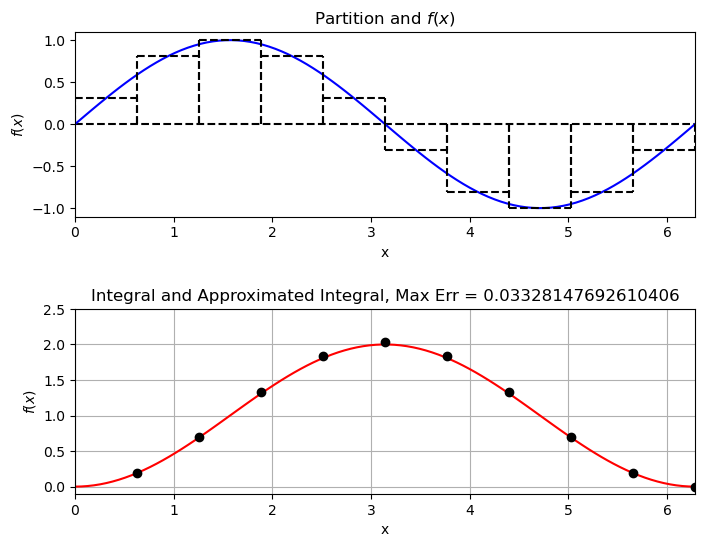

In [7]:
fig = plt.figure(figsize=(8,6))
fig.subplots_adjust(hspace=.5)
axes = fig.add_subplot(2, 1, 1)

axes.plot(x, numpy.zeros(x.shape), 'k--')
axes.plot(x, f(x), 'b')

for i in range(num_partitions):
    axes.plot([x_hat[i], x_hat[i]], [0.0, f(x_star[i])], 'k--')
    axes.plot([x_hat[i + 1], x_hat[i + 1]], [0.0, f(x_star[i])], 'k--')
    axes.plot([x_hat[i], x_hat[i + 1]], [f(x_star[i]), f(x_star[i])], 'k--')
    
axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Partition and $f(x)$")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-1.1, 1.1))

I_hat = numpy.zeros(num_partitions)
I_hat[0] = f(x_star[0]) * delta_x
for i in range(1, num_partitions):
    I_hat[i] = I_hat[i - 1] + f(x_star[i]) * delta_x
    
axes = fig.add_subplot(2, 1, 2)

axes.plot(x, I(x), 'r')
# Offset due to indexing above
axes.plot(x_star + delta_x / 2.0, I_hat, 'ko')

err = numpy.abs(I(x_hat[1:]) - I_hat)

axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Integral and Approximated Integral, Max Err = {}".format(err.max()))
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-0.1, 2.5))
axes.grid()

plt.show()

### General Newton-Cotes Quadrature

Using $n+1$ equally spaced points on a single interval $x\in[a,b]$, evaluate $f(x)$ at these points and exactly integrate the interpolating polynomial:

$$I_n[f] = \int^b_a P_n(x) dx$$

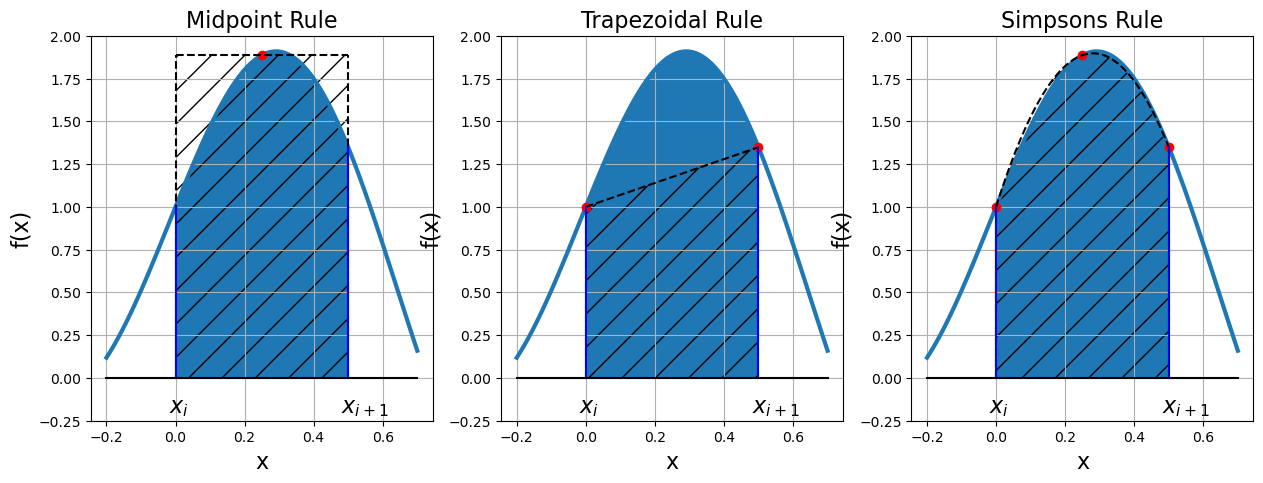

In [10]:
func = lambda x: 1 - x**2 + numpy.sin(5*x)
x0 = 0.
x1 = .5
x_buf = .2
x = numpy.linspace(x0 - x_buf, x1+ x_buf, 100)
x_interval = numpy.linspace(x0, x1, 100)

x_samp = numpy.array([ 0.5*(x0 + x1) ])
f_samp = func(x_samp)

fig = plt.figure(figsize=(15,5))
axes = fig.add_subplot(1,3,1)
axes.plot(x,func(x),linewidth=3)
axes.plot(x_samp, f_samp, 'ro')
axes.plot(x_interval, f_samp*numpy.ones(x_interval.shape), 'k--')
axes.plot(x0*numpy.ones(2), [0., f_samp[0]],'k--')
axes.plot(x1*numpy.ones(2), [0., f_samp[0]],'k--')
axes.plot(x0*numpy.ones(2), [0., func(x0)],'b')
axes.plot(x1*numpy.ones(2), [0., func(x1)],'b')
axes.plot(x, numpy.zeros(x.shape),'k')
axes.text(x0-.02,-.2,'$x_i$',fontsize=16)
axes.text(x1-.02,-.2,'$x_{i+1}$',fontsize=16)
axes.set_title('Midpoint Rule',fontsize=16)
axes.set_xlabel('x', fontsize=16)
axes.set_ylabel('f(x)', fontsize=16)
axes.set_ylim((-0.25, 2.))
axes.fill_between(x_interval,0.,func(x_interval))
axes.fill_between(x_interval, 0, f_samp*numpy.ones(x_interval.shape), hatch='/', alpha=0)
axes.grid()

axes = fig.add_subplot(1,3,2)
x_samp = numpy.array([x0, x1])
f_samp = func(x_samp)
axes.plot(x,func(x),linewidth=3)
axes.plot(x_samp, f_samp, 'ro')
axes.plot(x_samp, f_samp, 'k--')
axes.plot(x0*numpy.ones(2), [0., f_samp[0]],'k--')
axes.plot(x1*numpy.ones(2), [0., f_samp[1]],'k--')
axes.plot(x0*numpy.ones(2), [0., func(x0)],'b')
axes.plot(x1*numpy.ones(2), [0., func(x1)],'b')
axes.plot(x, numpy.zeros(x.shape),'k')
axes.text(x0-.02,-.2,'$x_i$',fontsize=16)
axes.text(x1-.02,-.2,'$x_{i+1}$',fontsize=16)
axes.set_title('Trapezoidal Rule',fontsize=16)
axes.set_xlabel('x', fontsize=16)
axes.set_ylabel('f(x)', fontsize=16)
axes.set_ylim((-0.25, 2.))
axes.fill_between(x_interval,0.,func(x_interval))
axes.fill_between(x_samp,0.,f_samp, hatch='/', alpha=0)


axes.grid()

axes = fig.add_subplot(1,3,3)
x_samp = numpy.array([x0, (x0 + x1)/2., x1])
f_samp = func(x_samp)
p = numpy.polyfit(x_samp, f_samp, 2)
f_p2 = numpy.polyval(p, x_interval)
axes.plot(x,func(x),linewidth=3)
axes.plot(x_samp, f_samp, 'ro')
axes.plot(x_interval, f_p2, 'k--')
axes.plot(x0*numpy.ones(2), [0., f_samp[0]],'k--')
axes.plot(x1*numpy.ones(2), [0., f_samp[-1]],'k--')
axes.plot(x0*numpy.ones(2), [0., func(x0)],'b')
axes.plot(x1*numpy.ones(2), [0., func(x1)],'b')
axes.plot(x, numpy.zeros(x.shape),'k')
axes.text(x0-.02,-.2,'$x_i$',fontsize=16)
axes.text(x1-.02,-.2,'$x_{i+1}$',fontsize=16)
axes.set_title('Simpsons Rule',fontsize=16)
axes.set_xlabel('x', fontsize=16)
axes.set_ylabel('f(x)', fontsize=16)
axes.set_ylim((-0.25, 2.))
axes.fill_between(x_interval,0.,func(x_interval))
axes.fill_between(x_interval,0.,f_p2, hatch='/', alpha=0)


axes.grid()
plt.show()

#### Trapezoidal Rule

Use $n = 1$ polynomial to derive the trapezoidal rule.

Trapezoidal rule uses $n = 1$ order polynomials between each point (i.e. piece-wise defined linear polynomials).  Using the Linear Lagrange basis we can write the interpolating polynomial as 

$$
    P_1(x) = f(x_i)\frac{x_{i+1}-x}{\Delta x} + f(x_{i+1})\frac{x - x_i}{\Delta x}
$$

where $\Delta x = x_{i+1}-x_i$ is the width of the interval.

Integrating this polynomial we have for a single interval

\begin{aligned}
    I_T[f] &= \int^{x_{i+1}}_{x_i} f(x_i)\ell_0(x) + f(x_{i+1})\ell_1(x) dx  \\
    &=\frac{1}{\Delta x}  \left. \left[ f(x_i)\left(x_{i+1}x - \frac{x^2}{2}\right) + f(x_{i+1})\left(\frac{x^2}{2}-xx_i\right) \right] \right|_{x_i}^{x_{i+1}} \\
    &= \frac{1}{\Delta x}  \left[ f(x_i)\left(\frac{x_{i+1}^2}{2} -x_ix_{i+1} + \frac{x_i^2}{2}\right) + f(x_{i+1})\left(\frac{x_{i+1}^2}{2} -x_ix_{i+1} + \frac{x_i^2}{2}\right) \right]\\
    &= \frac{(x_{i+1} - x_i)^2}{2\Delta x}\left[ f(x_i) + f(x_{i+1})\right]\\
    & = \frac{\Delta x}{2}\left[ f(x_i) + f(x_{i+1}) \right] \\
    & = \Delta x\left[ \frac{1}{2} f(x_i) + \frac{1}{2} f(x_{i+1})\right]
\end{aligned}

### Transformation of the interval

For quadrature,  it is often  more convenient to transform the interval from $[x_i, x_{i+1}]$ to the unit interval using the transformation

$$
    x(s) = x_i + s\Delta x
$$

where $s\in[0,1]$ is just the fractional distance across the element and $dx = \Delta x ds$.

As before,  in this frame 
$$
    \ell_0(s) = (1-s), \quad \ell_1(s) = s
$$

Under this transformation,  the original integral
$$
    I_T[f] = \int^{x_{i+1}}_{x_i} f(x_i)\ell_0(x) + f(x_{i+1})\ell_1(x) dx  
$$

Becomes much simpler
$$
    I_T[f] = \Delta x \int_{0}^{1} f(x_i)(1 - s) + f(x_{i+1})s\, ds  
$$

or
$$
\begin{aligned}
I_T[f] &= \Delta x \left. \left[ f(x_i)(s -\frac{s^2}{2}) + f(x_{i+1}) \frac{s^2}{2} \right]  \right|_0^1\\
    & = \Delta x\left[ \frac{1}{2} f(x_i) + \frac{1}{2} f(x_{i+1})\right]
\end{aligned}
$$


### Extended Trapezoidal rule

If we now panel a larger interval with $N$ panels of size $\Delta x$,  we can calculate the *Extended Trapezoidal rule*, by summing the individual contributions of each Trapezoidal panel. 

$$
    I_N[f] = \sum_{j=1}^N I_T[f]_j 
$$

We can also simplify the sum over all the intervals by noting that all but the end points will have total contribution of $\Delta x$ to the entire sum such that

$$
    I_N[f] = \Delta x \left[ \frac{1}{2} (f(x_0) + f(x_N) ) + \sum^{N-1}_{j=1} f(x_j) \right]
$$



In [17]:
# Note that this calculates the cumulative integral from 0.0

f = lambda x: numpy.sin(x)
I = lambda x: 1.0 - numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

num_partitions = 10
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
delta_x = x_hat[1] - x_hat[0]

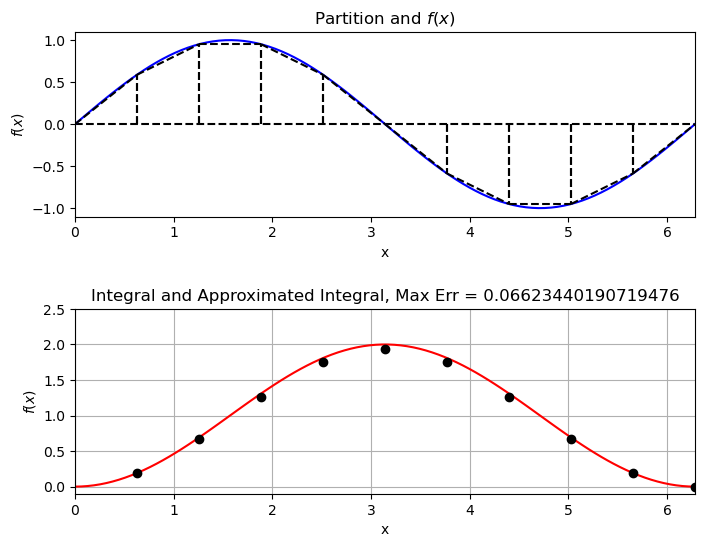

In [18]:
fig = plt.figure(figsize=(8,6))
fig.subplots_adjust(hspace=.5)
axes = fig.add_subplot(2, 1, 1)

axes.plot(x, numpy.zeros(x.shape), 'k--')
axes.plot(x, f(x), 'b')

for i in range(num_partitions):
    axes.plot([x_hat[i], x_hat[i]], [0.0, f(x_hat[i])], 'k--')
    axes.plot([x_hat[i + 1], x_hat[i + 1]], [0.0, f(x_hat[i+1])], 'k--')
    axes.plot([x_hat[i], x_hat[i + 1]], [f(x_hat[i]), f(x_hat[i+1])], 'k--')
    
axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Partition and $f(x)$")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-1.1, 1.1))

I_hat = numpy.zeros(num_partitions)
I_hat[0] = (f(x_hat[1]) + f(x_hat[0])) * delta_x / 2.0
for i in range(1, num_partitions):
    I_hat[i] = I_hat[i - 1] + (f(x_hat[i + 1]) + f(x_hat[i])) * delta_x / 2.0

err = numpy.abs(I(x_hat[1:]) - I_hat)

axes = fig.add_subplot(2, 1, 2)

axes.plot(x, I(x), 'r')
# Offset due to indexing above
axes.plot(x_hat[1:], I_hat, 'ko')

axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Integral and Approximated Integral, Max Err = {}".format(err.max()))
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-0.1, 2.5))
axes.grid()

plt.show()

#### Simpson's Rule

Simpson's rule uses $N = 2$ order polynomials between each point (i.e. piece-wise defined quadratic polynomials at points $(x_i, x_i+\Delta x/2, x_{i+1}$ where $\Delta x = x_{i+1} - x_{i}$).  

The polynomial in the Lagrange basis has the form

$$P_2(x) = f(x_i)\ell_0(x) + f(x_i + \Delta x/2)\ell_1(x) + f(x_{i+1})\ell_2(x)$$

Which we can just integrate to find

$$
I_S[f] = \int^{x_{i+1}}_{x_i} P_2(x) dx
$$

For this problem,  transformation of the interval  makes this much easier, and the Quadrature rule becomes

$$
\begin{aligned}
I_S[f] &= \Delta x\int_0^1  \left[f_0\ell_0(s) + f_1\ell_1(s) + f_2\ell_2(s)\right]\,ds\\
       &= \Delta x\int_0^1 \left[f_0\frac{(s-1/2)(s-1)}{1/2} + f_1 \frac{s(s-1)}{-1/4} + f_2\frac{s(s-1/2)}{1/2}\right]\,ds
\end{aligned}
$$

after a bit of work we get

$$   \begin{aligned}I_S[f] &= \Delta x\left[\frac{1}{6} f(x_i) + \frac{2}{3} f(x_i + 1/2\Delta x) + \frac{1}{6} f(x_{i+1}) \right] \\
&= \frac{\Delta x}{6}\left[f(x_i) + 4 f(x_i + 1/2\Delta x) + f(x_{i+1}) \right] \\
\end{aligned}
$$

Note:  Like all quadrature rules,  the integral over a single interval of size $\Delta x$ is always

$$
    I \approx \Delta x\sum_{i=0}^n w_i f(x_i)
$$

### Derivation of Newton Cotes formulas using the method of undetermined coefficients.  

Use the general form of the quadrature rule and determine weights $w_j$ by using functions we know the solution to.  These functions can be any representation of polynomials up to order $N=2$ however the monomials $1$, $x$, $x^2$ are the easiest in this case.

$$
    I_{\Delta x}[f] = w_0 f(0) + w_1 f(\Delta x / 2) + w_2 f(\Delta x)
$$

$$\begin{aligned}
    &\text{if}~f = 1:  &I[f] =  \int^{\Delta x}_{0} 1 dx = \Delta x  \\
    &\text{if}~f = x:  &I[f] =  \int^{\Delta x}_{0} x dx = \frac{\Delta x^2}{2} \\
    &\text{if}~f = x^2:  &I[f] =  \int^{\Delta x}_{0} x^2 dx = \frac{\Delta x^3}{3}
\end{aligned}$$

What are the corresponding systems of equations?

$$
    I[f] = w_0 f(0) + w_1 f(\Delta x / 2) + w_2 f(\Delta x)
$$

$$\begin{aligned}
    &\text{if}~f = 1:  &I[f] =  \int^{\Delta x}_{0} 1 dx = \Delta x & & I_N[1] &= w_0 + w_1 + w_2 \\
    &\text{if}~f = x:  &I[f] =  \int^{\Delta x}_{0} x dx = \frac{\Delta x^2}{2} & & I_N[x] &= w_1 \frac{\Delta x}{2} + w_2\Delta x\\
    &\text{if}~f = x^2:  &I[f] =  \int^{\Delta x}_{0} x^2 dx = \frac{\Delta x^3}{3} & & I_N[x^2] &= \frac{\Delta x^2}{4} w_1 + w_2\Delta x^2\\
\end{aligned}$$

We then have the system of equations:
$$\begin{aligned}
    w_0 &+& w_1 &+& w_2 &=\Delta x \\
        &\quad& \frac{\Delta x}{2} w_1 &+& \Delta x w_2  &= \frac{\Delta x^2}{2} \\
        &\quad& \frac{\Delta x^2}{4} w_1 &+& \Delta x^2 w_2 &=\frac{\Delta x^3}{6} \\
\end{aligned}$$

or in Matrix-vector form $A\mathbf{x}=\mathbf{b}$

$$\begin{bmatrix}
1 & 1 & 1 \\
0 & \Delta x/2 &  \Delta x \\
0 & \Delta x^2/4 & \Delta x^2 \\
\end{bmatrix}
\begin{bmatrix} w_0 \\ w_1 \\  w_2 \\ \end{bmatrix}=
\begin{bmatrix} \Delta x \\ \Delta x^2/2 \\  \Delta x^3/6 \\ \end{bmatrix}
$$




or after some manipulation (and elimination) gives 

$$
\begin{bmatrix}
    1 & 1 & 1 \\
    0 & 1 / 2 & 1 \\
    0 & 1 / 4 & 1 \\
\end{bmatrix} \begin{bmatrix}
    w_0 \\ w_1 \\ w_2
\end{bmatrix} = \Delta x \begin{bmatrix} 
    1 \\ 1 / 2 \\ 1 / 3
\end{bmatrix}\Rightarrow 
\begin{bmatrix}
    1 & 1 & 1 \\
    0 & 1 / 2 & 1 \\
    0 & 0 & 1 \\
\end{bmatrix} \begin{bmatrix}
    w_0 \\ w_1 \\ w_2
\end{bmatrix} = \Delta x \begin{bmatrix} 
    1 \\   1 / 2 \\   1 / 6
\end{bmatrix}
$$

Leading to 

$$ w_2 = \frac{\Delta x}{6} \quad w_1 = \frac{2}{3} \Delta x \quad w_0 = \frac{\Delta x}{6}$$

Another way to write Simpson's rule is to use intervals of three points (similar to one of the ways we did this last time).  The formulation here effectively has a $\Delta x$ half of what the intervals show but is easier to program.

In [19]:
# Note that this calculates the cumulative integral from 0.0

f = lambda x: numpy.sin(x)
I = lambda x: 1.0 - numpy.cos(x)
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)

num_partitions = 10
x_hat = numpy.linspace(0.0, 2.0 * numpy.pi, num_partitions + 1)
delta_x = x_hat[1] - x_hat[0]

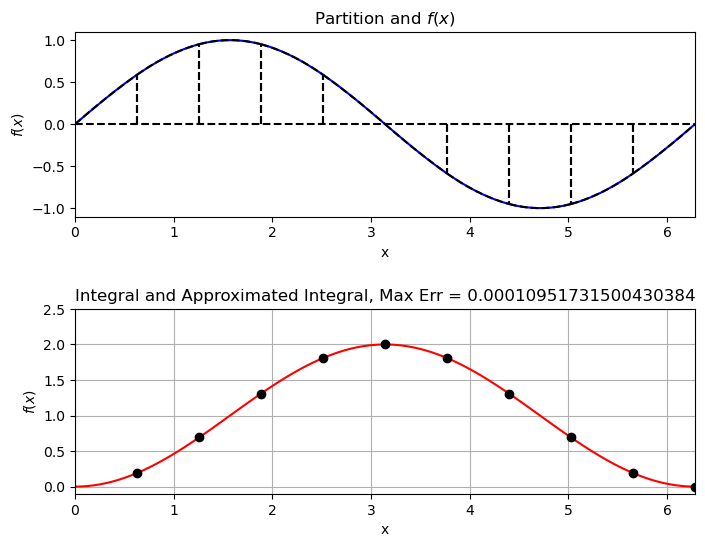

In [20]:
fig = plt.figure(figsize=(8,6))
fig.subplots_adjust(hspace=.5)
axes = fig.add_subplot(2, 1, 1)

axes.plot(x, numpy.zeros(x.shape), 'k--')
axes.plot(x, f(x), 'b')

for i in range(num_partitions):
    axes.plot([x_hat[i], x_hat[i]], [0.0, f(x_hat[i])], 'k--')
    axes.plot([x_hat[i + 1], x_hat[i + 1]], [0.0, f(x_hat[i + 1])], 'k--')
    coeff = numpy.polyfit((x_hat[i], x_hat[i] + delta_x / 2.0, x_hat[i + 1]), 
                          (f(x_hat[i]), f(x_hat[i] + delta_x / 2.0), f(x_hat[i+1])), 2)
    x_star = numpy.linspace(x_hat[i], x_hat[i+1], 10)
    axes.plot(x_star, numpy.polyval(coeff, x_star), 'k--')
    
axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Partition and $f(x)$")
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-1.1, 1.1))
#axes.grid()

I_hat = numpy.zeros(num_partitions)
I_hat[0] = delta_x * (1.0 / 6.0 * (f(x_hat[0]) + f(x_hat[1])) + 2.0 / 3.0 * f(x_hat[0] + delta_x / 2.0))
for i in range(1, num_partitions):
    I_hat[i] = I_hat[i - 1] + delta_x * (1.0 / 6.0 * (f(x_hat[i]) + f(x_hat[i+1])) + 2.0 / 3.0 * f(x_hat[i] + delta_x / 2.0))
    
err = numpy.abs(I(x_hat[1:]) - I_hat)
    
axes = fig.add_subplot(2, 1, 2)

axes.plot(x, I(x), 'r')
# Offset due to indexing above
axes.plot(x_hat[1:], I_hat, 'ko')

axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.set_title("Integral and Approximated Integral, Max Err = {}".format(err.max()))
axes.set_xlim((0.0, 2.0 * numpy.pi))
axes.set_ylim((-0.1, 2.5))
axes.grid()

plt.show()

## Error Analysis

From before we have a particular $n$-point quadrature scheme $I_n$ for a single interval which we can also write as

$$
    I_n[f] = \sum^{n-1}_{i=0} w_i f(x_i).
$$

Define the error $E[f]$ such that

$$I[f] = I_n[f] + E_n[f]$$

The *degree* of $I_n[f]$ is the integer $p$ such that $E_n[P_i] = 0 \quad \forall i \leq p$ and $\exists P_{p+1}$ such that $E[P_{p+1}] \neq 0$. In other words,  it is the maximum degree polynomial that is integrated *exactly* using $I_n$.  As we will show

* Mid-point rule: p=1 -- exact for all linear polynomials
* Trapezoidal rule: p=1 -- also exact for all linear polynomials
* Simpson's rule: p=3 -- exact for all cubic polynomials

There are multiple (related) ways to estimate Quadrature error that either use the Taylor series or the Lagrange Remainder theorem.  

#### Mid-Point error

For a 1-Point quadrature rule like the Mid-point rule,  Taylor's theorem is easiest to use as we can just expand $f(x)$ around the midpoint such that

$$
    f(x) = f(x^*) + f'(x^*)(x - x^*) + \frac{f''(x^*)}{2}(x - x^*)^2 + O(f'''(x - x^*)^3)
$$

where $x^*=(x_i + x_{i+1})/2$ is the midpoint of the interval

Integrating over one element $x\in[x_i,x_{i + 1}]$ Gives

$$
\begin{align}
    \int_{x_i}^{x_{i+1}} f(x) dx  &=  \int_{x_i}^{x_{i+1}} \left(f(x^*) + f'(x^*)(x - x^*) + \frac{f''(x^*)}{2}(x - x^*)^2 + O(f'''(x - x^*)^3)\right) dx\\
    &=  f(x^*)\Delta x + \int_{x_i}^{x_{i+1}}  \left(f'(x^*)(x - x^*) + \frac{f''(x^*)}{2}(x - x^*)^2 + O(f'''(x - x^*)^3)\right) dx\\
    \end{align}
$$

or
$$
    I[f] = I_M[f] + \int_{x_i}^{x_{i+1}} f'(x^*)(x - x^*)dx + \int_{x_i}^{x_{i+1}} \frac{f''(x^*)}{2}(x - x^*)^2dx + HOT
$$

where $I_M[f] = f(x^*)\Delta x$ is the Midpoint quadrature rule.  

With a bit of work (or some clear thinking) you can show that the the second term on the RHS is exactly zero and that the leading order error term comes from  the third-term which evaluates to 

$$
    R_M[f] = \frac{\Delta x^3 f''(x_{1/2})}{24}
$$

As the mid-point rule is exact for degree 1 polynomials (i.e. straight lines) 

### Error Estimates using Polynomial interpolation

We can also use our polynomial analysis  to analyze  errors.  From Lagrange's theorem we have the remainder term as before which we can use to look at the error

$$R_N(x) = (x - x_0)(x - x_1) \cdots (x- x_N) \frac{f^{(N+1)}(c)}{(N+1)!}$$

and integrate it to find the form and magnitude of the error on a *single* interval.  

#### Trapezoidal error

With $n=1$ we have

$$R_1(x) = (x - x_i) (x - x_{i+1}) \frac{f''(c)}{2}$$

Integrating this leads to

$$\int^{x_{i+1}}_{x_i} (x - x_i) (x - x_{i+1}) \frac{f''(c)}{2} dx = \frac{\Delta x^3}{12} f''(c)$$

**Note**: 
   * The single-interval error for the Trapezoidal rule is of the same order as the Mid-point rule
   * Surprisingly, the magnitude of error for the Trapezoidal rule is **twice** that of the Mid-point rule!

#### Simpson's Rule Error

We could apply the same approach to Simpson's rule using the remainder term for quadratic functions

$$R_2(x) = (x - x_i) \left(x - x_i - \frac{\Delta x}{2} \right) (x - x_{i+1}) \frac{f'''(c)}{3!}$$

However we would actually find that this term cancels exactly (in the same way that the mid-point scheme has a cancellation in the Taylor series expansion).  A more detailed Taylor's series analysis shows that the leading error term for Simpson's rule is 

$$E_S[f] = -\frac{1}{180}\Delta x^5 f^{(4)}(c)$$

which is exact for cubic polynomials ($p=3$). Interestingly we have gained two orders of accuracy by increasing the polynomial order by only 1!

### Review:  Newton-Cotes Formulas and errors for a single interval 

given $x\in[x_i, x_{i+1}]$ and $\Delta x = x_{i+1} - x_i$, all of the   Newton-Cotes quadrature formula's can be derived by integrating the interpolating polynomial through $N$ equi-spaced points across the interval.  

* Mid-point: 1-point quadrature rule
$$
    I_M[f] = \Delta x\, f(x_i + \Delta x/2) + O(\Delta x^3f'')
$$
* Trapezoidal Rule: 2-point quadrature rule
$$
    I_T[f] = \Delta x\, \left[\frac{1}{2}f(x_i) +\frac{1}{2}f(x_{i+1})\right] + O(\Delta x^3f'')
$$
* Simpson's Rule: 3-point quadrature rule
$$
    I_S[f] = \Delta x\, \left[ \frac{1}{6}f(x_i) +  \frac{2}{3}f(x_i +\Delta x/2) +\frac{1}{6}f(x_{i+1})\right] + O(\Delta x^5f^{iv})
$$


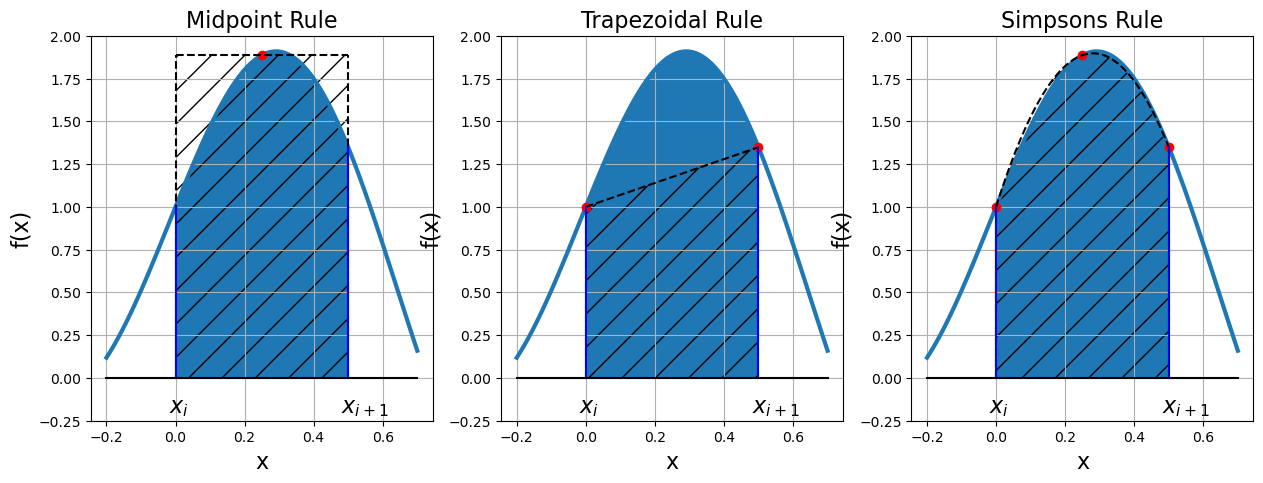

In [21]:
func = lambda x: 1 - x**2 + numpy.sin(5*x)
x0 = 0.
x1 = .5
x_buf = .2
x = numpy.linspace(x0 - x_buf, x1+ x_buf, 100)
x_interval = numpy.linspace(x0, x1, 100)

x_samp = numpy.array([ 0.5*(x0 + x1) ])
f_samp = func(x_samp)

fig = plt.figure(figsize=(15,5))
axes = fig.add_subplot(1,3,1)
axes.plot(x,func(x),linewidth=3)
axes.plot(x_samp, f_samp, 'ro')
axes.plot(x_interval, f_samp*numpy.ones(x_interval.shape), 'k--')
axes.plot(x0*numpy.ones(2), [0., f_samp[0]],'k--')
axes.plot(x1*numpy.ones(2), [0., f_samp[0]],'k--')
axes.plot(x0*numpy.ones(2), [0., func(x0)],'b')
axes.plot(x1*numpy.ones(2), [0., func(x1)],'b')
axes.plot(x, numpy.zeros(x.shape),'k')
axes.text(x0-.02,-.2,'$x_i$',fontsize=16)
axes.text(x1-.02,-.2,'$x_{i+1}$',fontsize=16)
axes.set_title('Midpoint Rule',fontsize=16)
axes.set_xlabel('x', fontsize=16)
axes.set_ylabel('f(x)', fontsize=16)
axes.set_ylim((-0.25, 2.))
axes.fill_between(x_interval,0.,func(x_interval))
axes.fill_between(x_interval, 0, f_samp*numpy.ones(x_interval.shape), hatch='/', alpha=0)
axes.grid()

axes = fig.add_subplot(1,3,2)
x_samp = numpy.array([x0, x1])
f_samp = func(x_samp)
axes.plot(x,func(x),linewidth=3)
axes.plot(x_samp, f_samp, 'ro')
axes.plot(x_samp, f_samp, 'k--')
axes.plot(x0*numpy.ones(2), [0., f_samp[0]],'k--')
axes.plot(x1*numpy.ones(2), [0., f_samp[1]],'k--')
axes.plot(x0*numpy.ones(2), [0., func(x0)],'b')
axes.plot(x1*numpy.ones(2), [0., func(x1)],'b')
axes.plot(x, numpy.zeros(x.shape),'k')
axes.text(x0-.02,-.2,'$x_i$',fontsize=16)
axes.text(x1-.02,-.2,'$x_{i+1}$',fontsize=16)
axes.set_title('Trapezoidal Rule',fontsize=16)
axes.set_xlabel('x', fontsize=16)
axes.set_ylabel('f(x)', fontsize=16)
axes.set_ylim((-0.25, 2.))
axes.fill_between(x_interval,0.,func(x_interval))
axes.fill_between(x_samp,0.,f_samp, hatch='/', alpha=0)


axes.grid()

axes = fig.add_subplot(1,3,3)
x_samp = numpy.array([x0, (x0 + x1)/2., x1])
f_samp = func(x_samp)
p = numpy.polyfit(x_samp, f_samp, 2)
f_p2 = numpy.polyval(p, x_interval)
axes.plot(x,func(x),linewidth=3)
axes.plot(x_samp, f_samp, 'ro')
axes.plot(x_interval, f_p2, 'k--')
axes.plot(x0*numpy.ones(2), [0., f_samp[0]],'k--')
axes.plot(x1*numpy.ones(2), [0., f_samp[-1]],'k--')
axes.plot(x0*numpy.ones(2), [0., func(x0)],'b')
axes.plot(x1*numpy.ones(2), [0., func(x1)],'b')
axes.plot(x, numpy.zeros(x.shape),'k')
axes.text(x0-.02,-.2,'$x_i$',fontsize=16)
axes.text(x1-.02,-.2,'$x_{i+1}$',fontsize=16)
axes.set_title('Simpsons Rule',fontsize=16)
axes.set_xlabel('x', fontsize=16)
axes.set_ylabel('f(x)', fontsize=16)
axes.set_ylim((-0.25, 2.))
axes.fill_between(x_interval,0.,func(x_interval))
axes.fill_between(x_interval,0.,f_p2, hatch='/', alpha=0)


axes.grid()
plt.show()

##### Example 1:

Given $f(x) = \sin \pi x$. Let's consider the relative accuracy of midpoint, trapezoidal and simpson's rules for a single interval $x\in[0,1]$.

$$\begin{aligned}
    \text{Exact:}  &I[f] = \int^1_0 \sin \pi x = \left . \frac{-\cos \pi x}{\pi} \right |^1_0 = \frac{2}{\pi} \approx 0.636619772 \\
    \text{Midpoint:}  &I_M[f] = \Delta x f(1/2) = \sin (\pi / 2) = 1 \\
    \text{Trapezoid:}  &I_T[f] = \frac{\Delta x}{2} (\sin(0) + \sin(\pi)) = 0 \\
    \text{Simpson's:}  &I_S[f] = \frac{\Delta x}{6} \sin(0) + \frac{2 \Delta x}{3} \sin(\pi / 2) + \frac{\Delta x}{6} \sin(\pi) = \frac{2 \Delta x}{3} = \frac{2}{3}
\end{aligned}$$

##### Calculate the relative error for each of these estimates

In [22]:
err=numpy.abs(2/numpy.pi - 2/3)
err


0.030046894299085247

### Error in extended Newton-Cotes formulas

To find the total error we must sum the error over all the intervals:

$$I[f] = \sum_{i=0}^N \int^{x_{i+1}}_{x_i} P_n(x) dx + \sum_{i=0}^N \int^{x_{i+1}}_{x_i} R_n(x) dx = I_N[f] + E_N[f]$$

as we defined before.

####  Extended Midpoint (and Trapezoidal) rule error

If we sum up across all the intervals the total error for the mid-point rule is

$$E_N[f] = -\frac{\Delta x^3}{24} \sum_{i=0}^{N} f''(c_i)$$

or noting that $\Delta x = (b-a)/N$ we can write this a bit more physically as

$$E_N[f] = -\frac{1}{24} \Delta x^2 (b - a) \left [ \frac{1}{N} \sum^{N-1}_{i=0} f''(c_i) \right ]$$

such that expression in the brackets is the mean value of the second derivative over the interval $[a,b]$.  This also shows that the extended  trapezoidal rule converges quadratically as $\Delta x \rightarrow 0$ (or $N\rightarrow\infty$).

In general, for $N$ panels of any given Newton-Cotes  quadrature formula over the interval $x\in[a,b]$, the approximate integral and error formulas are

\begin{align}
I[f] &= \sum_{i=0}^N I_t + E_N\\
\end{align}
where 
$$
    E_N = (b-a)O(\Delta x^p f^{m}(c))
$$

* Extended Mid-point: 
$$
    E_{N_M} = (b-a) O(\Delta x^2 f'')
$$
* Extended Trapezoidal Rule: 
$$
    E_{N_T} = (b-a) O(\Delta x^2 f'')
$$
* Extended Simpson: 
$$
    E_{N_S} = (b-a) O(\Delta x^4 f^{(iv)})
$$

Where $\Delta x = \frac{b -a }{N}$

#### Convergence of Extended N-C quadrature

Here we plot the relative error for various extended Newton-Cotes quadrature formulas for the test case

$$
    I = \int_0^1 \sin(\pi x) dx = \frac{2}{\pi}
$$

In [ ]:
# Compute the error as a function of delta_x for each method
f = lambda x: numpy.sin(numpy.pi * x)

num_partitions = numpy.array([ 2**n for n in range(0, 16)])
delta_x = numpy.empty(len(num_partitions))
error_mid = numpy.empty(len(num_partitions))
error_trap = numpy.empty(len(num_partitions))
error_simpson = numpy.empty(len(num_partitions))

I_true = 2.0/numpy.pi

for (j, N) in enumerate(num_partitions):
    x_hat = numpy.linspace(0.0, 1.0, N + 1)
    delta_x[j] = x_hat[1] - x_hat[0]

    # Compute Midpoint
    x_star = 0.5 * (x_hat[1:] + x_hat[:-1])
    I_hat = 0.0
    for i in range(0, N):
        I_hat += f(x_star[i]) * delta_x[j]
    error_mid[j] = numpy.abs(I_hat - I_true)/I_true
    
    # Compute trapezoid
    I_hat = 0.0
    for i in range(1, N):
        I_hat += (f(x_hat[i + 1]) + f(x_hat[i])) * delta_x[j] / 2.0
    error_trap[j] = numpy.abs(I_hat - I_true)/I_true
    
    # Compute simpson's    
    I_hat = 0.0
    for i in range(0, N):
        I_hat += delta_x[j] * (1.0 / 6.0 * (f(x_hat[i]) + f(x_hat[i+1])) + 2.0 / 3.0 * f(x_hat[i] + delta_x[j] / 2.0))
    error_simpson[j] = numpy.abs(I_hat - I_true)/I_true

fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1, 1, 1)

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, error_mid, 'ro', label="Midpoint")
axes.loglog(delta_x, error_trap, 'bo', label="Trapezoid")
axes.loglog(delta_x, error_simpson, 'go', label="Simpson's")
axes.loglog(delta_x, order_C(delta_x[0], error_trap[0], 2.0) * delta_x**2.0, 'b--', label="2nd Order")
axes.loglog(delta_x, order_C(delta_x[0], error_simpson[0], 4.0) * delta_x**4.0, 'g--', label="4th Order")
axes.legend(loc='best')
axes.set_xlabel('$\Delta x$', fontsize=16)
axes.set_ylabel('Relative Error', fontsize=16)
axes.grid()

plt.show()

### Recursive Improvement of Accuracy

Say we ran the extended trapezoidal rule with step size $2 \Delta x$, we then will have

$$\begin{aligned}
			\int^{x_2}_{x_0} f(x) dx  &= \frac{2 \Delta x}{2} (f_0 + f_2) =  h (f_0 + f_2) \Rightarrow \\
			\int^b_a f(x)dx &\approx I_{2\Delta x}[f] = \sum^{N/2-1}_{j=0} \Delta x (f_{2j} + f_{2j+2}) \\
			&= \Delta x (f_{0} + f_{2})  + \Delta x (f_{2} + f_{4})  + \cdots + \Delta x (f_{N-2} + f_{N}) \\
			&= \Delta x\left ( f_0 + f_N +  2 \sum^{N/2-1}_{j=1} f_{2j} \right )
  \end{aligned}
$$

Now compare the two rules for $\Delta x$ and $2 \Delta x$:

$$\begin{align}I_{\Delta x}[f] &= \frac{\Delta x}{2} \left (f_0 + f_N + 2 \sum^{N-1}_{j=1} f_j \right)\\ I_{2 \Delta x}[f] &= \Delta x \left ( f_0 + f_N +  2 \sum^{N/2-1}_{j=1} f_{2j} \right )\end{align}$$

$$I_{\Delta x}[f] = \frac{1}{2} I_{2\Delta x} + \Delta x(f_1 + f_3 + \cdots + f_{N-1})$$

Here we see we can actually reuse the work we did to calculate $Q_{2 \Delta x}[f]$ to refine the integral.

### Arbitrary Intervals (Affine Transforms)

A lot of quadrature rules are defined on specific intervals, e.g $x\in[0,1]$ or $x\in[-1,1]$.  However any two intervals can always be mapped onto each other through an  *affine transform* or *affine map* which is a linear  transformation.

$$
    x = \alpha + \beta \xi
$$
where $\alpha$ is a shift and $\beta$ is a scaling.  

Given $\alpha$ and $\beta$,  the inverse map is simply

$$
    \xi = \frac{x - \alpha}{\beta}
$$

### Example:  

Map $ x \in [a,b]\rightarrow\xi \in [-1,1]$

In [ ]:
fig = plt.figure(figsize=(5,5))
axes = fig.add_subplot(1,1,1)
axes.plot(x,func(x),linewidth=3)
axes.fill_between(x_interval,0.,func(x_interval))
axes.plot(x, numpy.zeros(x.shape),'k')
axes.text(x0-.02,-.2,'$a$',fontsize=16)
axes.text((x0+x1)/2.-.02,-.2,'$x$',fontsize=16)
axes.text(x1-.02,-.2,'$b$',fontsize=16)
axes.set_xlabel('x', fontsize=16)
axes.set_ylabel('f(x)', fontsize=16)
axes.text(x0-.06,-.4,'$-1$',fontsize=16)
axes.text((x0+x1)/2.-.02,-.4,'$\\xi$',fontsize=16)
axes.text(x1-.02,-.4,'$1$',fontsize=16)
axes.set_ylim((-0.5, 2.))
axes.grid()


$$x =  \frac{a+b}{2} + \frac{b - a}{2}\xi $$

$$\xi = \left( x - \frac{a + b}{2}\right) \frac{2}{b-a}$$

Given an Affine mapping,  it is easy to transform any integral from one coordinate system to another

$$
    I[f] = \int^b_a f(x) dx = \int^1_{-1} f(x(\xi)) \frac{dx}{d\xi} d\xi = \frac{b - a}{2} \int^1_{-1} f(x(\xi)) d\xi\\
$$

and the $n$ point quadrature rule for a single interval is
$$
    I_n[f]_i = \frac{\Delta x_i}{2} \sum_{j=1}^{n} w_j f(x(\xi_j))
$$

where 

$$ 
    \sum_{j=1}^{n} w_j f(x(\xi_j)) \approx \int^1_{-1} f(x(\xi)) d\xi
$$

is the $n$ point quadrature rule on the interval $\xi \in [-1,1]$

and the cumulative integral over $N$ panels
$$
    I_N[f] = \sum_{i=1}^N I_n[f]_i
$$

#### Example:  Newton-Cotes Rules

We can rewrite our previous quadrature rules so that they are given on the interval $\xi \in [-1, 1]$ instead of $x \in [x_i, x_{i+1}]$.  Recall that a general quadrature rule can be written as
$$
    \sum^N_{j=1} w_j f(\xi_j)
$$
where $w_n$ are the weights and $\xi_j$ are the points specified to evaluate the function at. 

 For Newton-Cotes rules we know that the points $\xi_i$ are uniformly distributed on $[-1, 1]$ but we still need to define the weights.  For a 2-Point trapezoid rule we can do this to find that
 
$$
    \int^1_{-1} f(x) dx \approx 2\left[ \frac{1}{2}f(-1) + \frac{1}{2}f(1)\right] = f(-1) + f(1)
$$

so the quadrature points are at  $\xi = [-1, 1]$ with weights $w = [1, 1]$  

Note that if we map this using our affine transform we would get back the original trapezoid rule:
$$
    I_2[f] = \frac{dx}{d\xi}\sum_{n=1}^{2} w_n f(x(\xi_n))  = \frac{\Delta x}{2}\left(f(x(-1)) + f(x(1))\right) 
$$

Similarly for Simpson's rule we have
$$
    \xi = [-1, 0, 1] \quad \text{and} \quad w = \left[\frac{1}{3}, \frac{4}{3}, \frac{1}{3} \right].
$$

In [ ]:
def ncintegration(f, a, b, N):
    """ Approximate \int_a^b f(x)dx using  Newton-Cotes quadrature rules with N<=3 quadrature points"""
        
    assert (N > 0)
    assert (N < 4)
    # Build up a nested list of integration points and weights for the interval [-1, 1]:
    xNC = []
    wNC = []
    # 1 point Newton-Cotes (Mid-point) 
    xNC.append(numpy.array([0.]))
    wNC.append(numpy.array([2.]))
    # 2 point Newton-Cotes quadrature (Trapezoidal)
    xNC.append(numpy.array([ -1., 1. ]))
    wNC.append(numpy.array([ 1. , 1.]))
    # 3 point Newton-Cotes quadrature (Simpson's rule)
    xNC.append(numpy.array([-1., 0., 1.]))
    wNC.append(numpy.array([1., 4., 1.])/3.)
    
    # make affine map between x and xi
    xi_map = lambda xi: (b - a)/2. * xi + (a + b) / 2.
    
    I = (b - a)/2. * wNC[N-1].dot(f(xi_map(xNC[N-1])))
    return I



In [ ]:
f = lambda x: numpy.sin(x)
I = lambda x: - numpy.cos(x)

a = numpy.pi/4.
b = 3*numpy.pi/4.
#b = numpy.pi/2
I_true = I(b) - I(a)
print(I_true)

In [ ]:
x = numpy.linspace(0.0, 2.0 * numpy.pi, 100)
x_interval = numpy.linspace(a, b, 100)
fig = plt.figure(figsize=(5,5))
axes = fig.add_subplot(1,1,1)
axes.plot(x,f(x),linewidth=3)
axes.fill_between(x_interval,0.,f(x_interval))
axes.plot(x, numpy.zeros(x.shape),'k')

axes.grid()

In [ ]:
# Calculate Newton-Cotes Quadrature and relative errors for 1,2, and 3 point NC quadrature schemes
for N in range(1,4):
    I = ncintegration(f,a,b,N)
    err = numpy.abs(I - I_true)/numpy.abs(I_true)
    print('N = {}, I_N = {}, err = {}'.format(N, I, err))
    

## Optimal Quadrature Methods

Newton-Cotes formulas assume a fixed, regularly spaced set of quadrature points and calculate quadrature rules based on integrating the interpolating polynomial.  

Can we do better?

Actually, if we allow both the points and weights to be chosen in an optimal way, we can generate optimal quadrature rules with $N$ points that can exactly integrate polynomials up to order $p=2N-1$

### A Naive argument for $p=2N -1$ for an $N$ point quadrature scheme

Given an $N$ point quadrature scheme

$$
    \int_a^b f(x)dx = \sum_{i=1}^N w_i f(x_i)
$$

If we allow both $w_i$ and $x_i$ to be variables there are $2N$ unknowns and we can use the method of undetermined coefficients to generate $2N$ *non-linear* equations that exactly integrate all monomials up to degree $2N-1$.  

##### Example:  2-Point Gauss-Legendre Quadrature

Consider $N=2$ on $x \in [-1,1]$

$$I_2[f] = w_0 f(x_0) + w_1 f(x_1)$$

using the method of *undetermined coefficients* we can solve for the four unknowns $w_0, w_1, x_0, x_1$ that exactly integrate the first 4 monomials, $1, x, x^2, x^3$.

Let $$I[f] = \int_{-1}^{1} f(x)dx \quad\text{and}\quad I_2[f] = w_0 f(x_0) + w_1 f(x_1)$$

Then
$$\begin{aligned}
    &I[1] &=  \int^{1}_{-1} 1 dx = 2 & & I_2[1] &= w_0 + w_1\\
    &I[x] &=  \int^{1}_{-1} x dx = 0 & & I_2[x] &= w_0 x_0 + w_1 x_1\\
    &I[x^2] &=  \int^{1}_{-1} x^2 dx = \frac{2}{3} & & I_2[x^2] &= w_0 x_0^2 + w_1 x_1^2\\
    &I[x^3] &=  \int^{1}_{-1} x^3 dx = 0 & & I_2[x^3] &= w_0 x_0^3 + w_1 x_1^3\\
\end{aligned}$$

Or as a system of non-linear equations
$$\begin{aligned}
    &w_0 + w_1 = 2\\
    &w_0 x_0 + w_1 x_1 = 0\\
    &w_0 x_0^2 + w_1 x_1^2 = \frac{2}{3}\\
    &w_0 x_0^3 + w_1 x_1^3 = 0\\
\end{aligned}$$

Note that we need to solve for 4 unknowns $x_0$, $x_1$, $w_0$, and $w_1$.  If we guess $w_0=w_1=1$ by symmetry, it will just fall out that $x_0=-x_1$ and 

$$x_0 = -\sqrt{\frac{1}{3}}, x_1 = \sqrt{\frac{1}{3}}  $$

However, there turns out to be some much deeper math based on orthogonal polynomials that can generate both weights and quadrature points in a much more rigorous and well defined manner.

#### Quick Check

let's check this for $f(x)=x^3 - 3x^2 + 2x -1$

$$
    I[f] = \int_{-1}^1 f(x) dx = \left[ \frac{x^4}{4} - x^3 +x^2 -x \right]_{-1}^1
$$

In [23]:
f = lambda x: x**3 -3*x**2 +2*x -1.
If = lambda x: x**4/4 - x**3 + x**2 -x
I_true = If(1.) - If(-1.)
I_true

-4.0

In [24]:
x = numpy.sqrt(1./3)
I_2 = f(-x) + f(x)
I_2

-4.0

### Generalized Gaussian Quadrature

As it turns out,  both the weights and quadrature points for optimal Gaussian quadrature can be derived from the properties of families of orthogonal polynomials such as Chebyshev or Legendre polynomials.  

In general,  all orthogonal polynomials form a family of polynomials of all orders with the property that

$$
    \int_a^b \omega(x)P_m(x)P_n(x) dx = 0 \quad \text{for} \quad m\neq n
$$

where $m$, $n$ are the order of the polynomial and $\omega(x)$ is a weighting function.  

We say that the polynomials are *orthogonal* to each other under a weighted inner product. And because they are orthogonal, they are automatically linearly independent and can form a basis for the space of all polynomials up to degree $n$. 

Recall something similar for vectors $x,y\in\mathbb{R}^n$ with the standard inner product (dot product)
$$
    <x, y> = \sum^N_{i=1} x_i y_i = ||x|| \cdot ||y|| \cos \theta.
$$
If $<x, y> = 0$ then the vectors $x$ and $y$ are orthogonal.

#### Example:  The Legendre Polynomials

The Legendre polynomials form one family that are orthogonal with $\omega(x)=1$ over the interval $x\in[-1,1]$.

The first few Legendre Polynomials are 
\begin{align}
    P_0(x) &= 1\\
    P_1(x) &=x \\
    P_2(x) &= \frac{1}{2}(3x^2 -1)\\
    P_3(x) &= \frac{1}{2}x(5x^2 - 3)\\
       \vdots
\end{align}

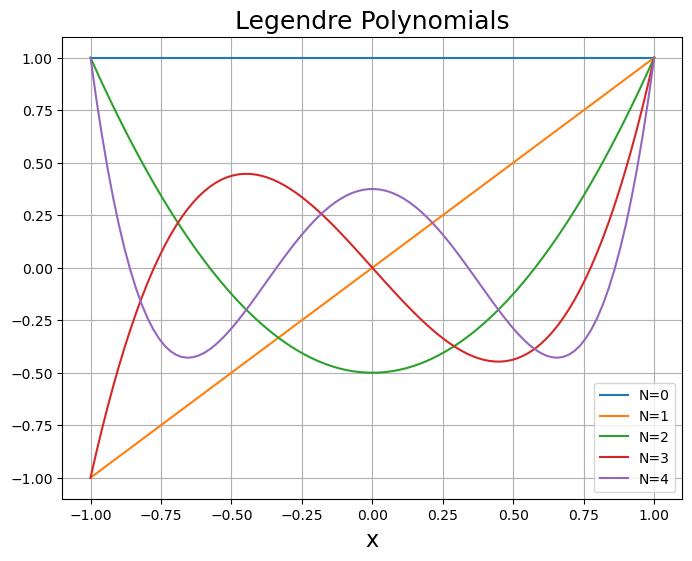

In [25]:
from scipy.special import legendre
x = numpy.linspace(-1,1,100)

fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1,1,1)
for N in range(5):
    Pn = legendre(N)
    axes.plot(x, Pn(x), label='N={}'.format(N))

axes.grid()
axes.set_title('Legendre Polynomials', fontsize=18)
axes.set_xlabel('x',fontsize=16)
axes.legend(loc='best')
plt.show()


### Big idea

Let  $P_N(x)$ be an  orthogonal polynomial of degree $N$ with weighting function $\omega(x)$ on some interval $x\in[a,b]$ it follows that

$$
    \int^b_{a} \omega(x) x^i P_N(x) dx = 0 \quad \forall i < N,
$$

i.e.  $P_N(x)$ is *orthogonal* to all monomials $x^i$ ($i <N$) with respect to the weight function $\omega(x)$.

This follows from the fact that the orthogonal polynomials form a basis and all monomials $x^n$ , can be written as a linear combination of $P_m$ for all $m\leq n$.

#### Example:  The Legendre Polynomials

Given
\begin{align}
    P_0(x) &= 1\\
    P_1(x) &=x \\
    P_2(x) &= \frac{1}{2}(3x^2 -1)\\
    P_3(x) &= \frac{1}{2}x(5x^2 - 3)\\
\end{align}

$$
\begin{align}
1 &= P_0 \\ 
x &= P_1\\
\end{align}
$$

 $$
 x^2 = \frac{2}{3}P_2 + \frac{1}{3}P_0
 $$ 

 $$
 x^3 = \frac{2}{5}P_3 + \frac{3}{5}P_1
 $$ 

Moreover,  any general polynomial $h(x)$ up to order $p = 2N-1$ can be written as 

$$
    h(x) = q(x)P_N(x) + r(x)
$$

where $q(x)$ is a quotient polynomial of degree $<N$ and $r(x)$ a remainder polynomial also of order strictly $<N$.  (Remember synthetic division?)

#### Example:  $N=2$, $p=2N-1=3$

let
$$
    h(x) = x^3 - 3x^2 + 4x + 2, \quad P_2 = \frac{1}{2}(3x^2-1)
$$

then  

$$
    h(x) = \left(\frac{2}{3}x -2\right)\frac{1}{2}(3x^2-1)+ \left(\frac{13}{3}x + 1\right)
$$

or 
$$
    q(x) = \left(\frac{2}{3}x -2\right),\quad r(x) = \left(\frac{13}{3}x + 1\right)
$$
both of which are 1st order polynomials

Given

$$
    h(x) = q(x)P_N(x) + r(x)
$$

By the properties of $P_N(x)$ it is easy to show two important results

$$
    \int_a^b \omega(x) h(x) dx = \int_a^b \omega(x)\left[q(x)P_N(x) + r(x)\right]dx = \int_a^b \omega(x) r(x) dx
$$

and given $x_i$ are the $N$ roots of $P_N(x)$

$$
    \sum_{i=1}^N w_i h(x_i) = \sum_{i=1}^N w_i \left[q(x_i)P_N(x_i) + r(x_i)\right] = \sum_{i=1}^N w_i r(x_i)
$$

Therefore we have a relationship between the weighted integral of $h$ and a discrete quadrature scheme with undetermined weights $w_i$.  All that remains is to find a set of weights that integrate all polynomials up to the order of $r(x)$ exactly. 

Given that we know the quadrature points $x_i$ as the roots of the Legendre polynomials,  we could compute the weights by the method of undetermined coefficients.

#### Example:  

Given
$$
    P_2(x) = \frac{1}{2}(3x^2 -1)
$$
with roots $x_i = \pm\sqrt{\frac{1}{3}}$ and quadrature rule $I_2[f] = w_0 f(x_0) + w_1 f(x_1)$

Then
$$\begin{aligned}
    &I[1] &=  \int^{1}_{-1} 1 dx = 2 & & I_2[1] &= w_0 + w_1\\
    &I[x] &=  \int^{1}_{-1} x dx = 0 & & I_2[x] &= -w_0 \sqrt{\frac{1}{3}} + w_1 \sqrt{\frac{1}{3}}\\
\end{aligned}$$

or

$$
    \begin{bmatrix} 1 & 1 \\ -\sqrt{\frac{1}{3}} & \sqrt{\frac{1}{3}} \\ \end{bmatrix}
    \begin{bmatrix} w_0 \\ w_1 \end{bmatrix} =
    \begin{bmatrix} 2 \\ 0 \end{bmatrix} 
$$

or
$$
    w_0 = w_1 = 1
$$


Alternatively,  we can use the lagrange basis sampled at the roots of $P_N(x)$ to expand $r(x)$ exactly as 

$$
    r(x) = \sum_{i=1}^N r(x_i)\ell_i(x)
$$

and therefore
$$
\begin{align}
\int_a^b \omega(x) r(x) dx &= \int_a^b \omega(x) \sum_{i=1}^N r(x_i)\ell_i(x) \\
            &= \sum_{i=1}^N r(x_i) \int_a^b \omega(x) \ell_i(x)\\
            &=  \sum_{i=1}^N w_i r(x_i)\\
           \end{align}
$$

or
$$
    w_i =  \int_a^b \omega(x) \ell_i(x)
$$

However, with a bit of work, the weights can can be calculated as functions of $P_n(x)$ (This is the tricky part) For a proof and considerably more detail see https://en.wikipedia.org/wiki/Gaussian_quadrature.

But given a formula for the weights the general quadrature scheme becomes

$$
    \int_a^b \omega(x) h(x) dx = \sum_{i=1}^N w_i h(x_i)
$$
Choosing the correct weighting function and basis leads to a number of useful quadrature approaches:

#### Gauss-Legendre Quadrature



General Gauss-Legendre quadrature uses $\omega(x) = 1$ and the Legendre Polynomials, which can be shown to have weights

$$w_i = \frac{2}{(1-x_i^2)(P'_n(x_i))^2}$$

and $x_i$ is the $i$th root of $P_n$.  

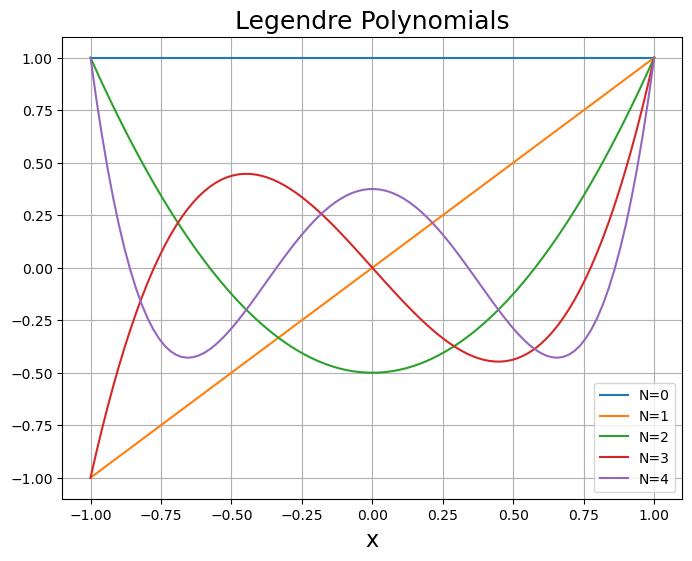

In [27]:
from scipy.special import legendre
x = numpy.linspace(-1,1,100)

fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1,1,1)
for N in range(5):
    Pn = legendre(N)
    axes.plot(x, Pn(x), label='N={}'.format(N))

axes.grid()
axes.set_title('Legendre Polynomials', fontsize=18)
axes.set_xlabel('x',fontsize=16)
axes.legend(loc='best')
plt.show()


Which lead to the quadrature points and weights...

<table width="80%">
    <tr align="center"><th>$$N$$</th> <th align="center">$$x_i$$</th> <th align="center"> $$w_i$$ </th></tr>
    <tr align="center"><td>$$1$$</td>           <td> $$0$$ </td> <td> $$2$$ </td> </tr>
    <tr align="center"><td>$$2$$</td>           <td> $$\pm \sqrt{\frac{1}{3}}$$ </td> <td> $$1$$ </td> </tr>
    <tr align="center"><td rowspan=2>$$3$$</td> <td> $$0$$ </td> <td> $$8/9$$ </td> </tr>
    <tr align="center">                     <td> $$\pm \sqrt{\frac{3}{5}}$$ </td> <td> $$5/9$$</td> </tr>
    <tr align="center"><td rowspan=2>$$4$$</td> <td> $$\pm \sqrt{\frac{3}{7} - \frac{2}{7} \sqrt{\frac{6}{5}}}$$</td> <td> $$\frac{18 + \sqrt{30}}{36}$$ </td> </tr>
    <tr align="center">                     <td> $$\pm \sqrt{\frac{3}{7} + \frac{2}{7} \sqrt{\frac{6}{5}}}$$</td> <td>$$\frac{18 - \sqrt{30}}{36}$$ </td> </tr>
    <tr align="center"><td rowspan=3>$$5$$</td> <td> $$0$$ </td> <td> $$\frac{128}{225}$$ </td> </tr>
    <tr align="center">                     <td> $$\pm \frac{1}{3} \sqrt{5 - 2 \sqrt{\frac{10}{7}}}$$</td> <td> $$\frac{322 + 13\sqrt{70}}{900}$$</td> </tr>
    <tr align="center">                     <td> $$\pm \frac{1}{3} \sqrt{5 + 2 \sqrt{\frac{10}{7}}}$$</td> <td> $$\frac{322 - 13\sqrt{70}}{900}$$</td> </tr>
</table>

Note the weights and quadrature points for the 2-Point Gauss-Legendre quadrature and compare to what we found by undetermined coefficients.

Again, all of the weights and quadrature points are defined on the interval $x\in[-1, 1]$ however these can be transferred to any arbitrary interval by an affine transformation. 

In [28]:
def glintegration(f, a, b, N):
    """ Approximate \int_a^b f(x)dx using  Gauss-Legendre quadrature rules with N<=4 quadrature points"""
        
    # Build up a nested list of gauss points and weights:
    xGl = []
    wGl = []
    # 1 point Gauss-legendre quadrature
    xGl.append(numpy.array([0.]))
    wGl.append(numpy.array([2.]))
    # 2 point Gauss-legendre quadrature
    xGl.append(numpy.array([ -1./numpy.sqrt(3.), 1./numpy.sqrt(3)]))
    wGl.append(numpy.array([ 1. , 1.]))
    # 3 point Gauss-legendre quadrature
    xGl.append(numpy.array([-numpy.sqrt(3. /5.), 0., numpy.sqrt(3. / 5.)]))
    wGl.append(numpy.array([5., 8., 5.])/9.)
    # 4 point Gauss-Legendre quadrature
    xGl.append(numpy.array([-numpy.sqrt(3.0 / 7.0 - 2.0 / 7.0 * numpy.sqrt(6.0 / 5.0)), 
           numpy.sqrt(3.0 / 7.0 - 2.0 / 7.0 * numpy.sqrt(6.0 / 5.0)),
          -numpy.sqrt(3.0 / 7.0 + 2.0 / 7.0 * numpy.sqrt(6.0 / 5.0)),
           numpy.sqrt(3.0 / 7.0 + 2.0 / 7.0 * numpy.sqrt(6.0 / 5.0))]))                 
    wGl.append(numpy.array([(18.0 + numpy.sqrt(30.0)) / 36.0, (18.0 + numpy.sqrt(30.0)) / 36.0,
         (18.0 - numpy.sqrt(30.0)) / 36.0, (18.0 - numpy.sqrt(30.0)) / 36.0]))
    
    # make affine map between x and xi
    xi_map = lambda xi: (b - a)/2. * xi + (a + b) / 2.
    
    I = (b - a)/2. * (wGl[N-1].dot(f(xi_map(xGl[N-1]))))
    return I



<>:2: SyntaxWarning: invalid escape sequence '\i'
<>:2: SyntaxWarning: invalid escape sequence '\i'
/var/folders/hp/_ndfh8c53hqfg381t3jbdqbr0000gn/T/ipykernel_53759/2117778251.py:2: SyntaxWarning: invalid escape sequence '\i'
  """ Approximate \int_a^b f(x)dx using  Gauss-Legendre quadrature rules with N<=4 quadrature points"""


##### Example: Gauss-Legendre Quadrature single interval

let $f(x) = \cos(x)$:

$$
    I[f] = \int_0^{\pi/2} f(x) dx = \left.\sin(x)\right|_0^{\pi/2} = 1.
$$

so the affine map from $x\in[0,\pi/2]\rightarrow\xi\in[-1,1]$ is

\begin{align}
x &=  \frac{\pi}{4} + \frac{\pi}{4}\xi \\
&= \frac{\pi}{4}\left(\xi + 1\right)
\end{align}

In [29]:
f = lambda x: numpy.cos(x)
I = 1.
x_interval = numpy.linspace(0., numpy.pi/2, 100)

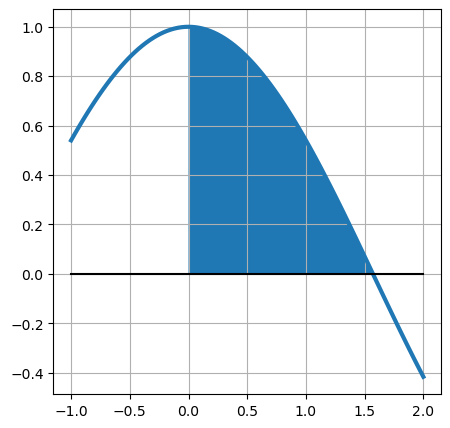

In [30]:
x = numpy.linspace(-1.,2, 100)
fig = plt.figure(figsize=(5,5))
axes = fig.add_subplot(1,1,1)
axes.plot(x,f(x),linewidth=3)
axes.fill_between(x_interval,0.,f(x_interval))
axes.plot(x, numpy.zeros(x.shape),'k')

axes.grid()
plt.show()

In [31]:
a = 0.
b = numpy.pi/2
I_true = 1.
err = numpy.zeros(4)
print('Gauss-Legendre N-point quadrature formulas\n')
for N in range(1,5):
    I = glintegration(f, a, b, N)
    err[N-1] = numpy.abs(I_true - I)
    print('N = {}, I = {}, err = {}'.format(N,I, err[N-1]))

Gauss-Legendre N-point quadrature formulas

N = 1, I = 1.1107207345395915, err = 0.11072073453959153
N = 2, I = 0.9984726134041148, err = 0.0015273865958852495
N = 3, I = 1.0000081215554983, err = 8.121555498341593e-06
N = 4, I = 0.9999999771971154, err = 2.2802884580563898e-08


In [32]:
errNC = numpy.zeros(4)
print('Newton-Cotes N-point quadrature formulas\n')
for N in range(1,4):
    I = ncintegration(f, a, b, N)
    errNC[N-1] = numpy.abs(I_true - I)
    print('N = {}, I = {}, err = {}'.format(N,I, errNC[N-1]))

Newton-Cotes N-point quadrature formulas



NameError: name 'ncintegration' is not defined

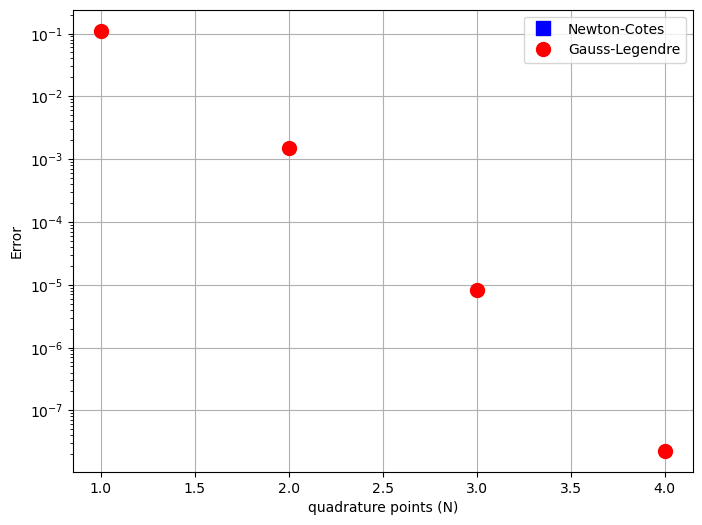

In [33]:
    
fig = plt.figure(figsize=(8, 6))
axes = fig.add_subplot(1, 1, 1)
axes.semilogy(range(1,5),errNC,'bs', markersize=10, label='Newton-Cotes')
axes.semilogy(range(1,5),err,'ro', markersize=10, label='Gauss-Legendre')
axes.set_ylabel('Error')
axes.set_xlabel('quadrature points (N)')
axes.legend(loc='best')
axes.grid()
plt.show()

### Check polynomial degree 

by integrating arbitrary polynomials of given order

In [ ]:
# 3rd order polynomial
f = lambda x: - 4*x**3 - 3.*x**2 + 2.*x +300.
int_f = lambda x:  - x**4 - x**3. + x**2 + x*300.

# 5th order polynomial
#f = lambda x: x**5 - 4*x**3 - 3.*x**2 + 2.*x +300.
#int_f = lambda x: x**6/6. - x**4 - x**3. + x**2 + x*300.

a = 1.
b = 4.
I_true = int_f(b) - int_f(a)
print('I_true = {}\n'.format(I_true))
for N in range(1,5):
    I = glintegration(f, a, b, N)
    err = numpy.abs(I - I_true)/numpy.abs(I_true)
    print('N = {}, I = {:5.6g}, rel_err = {} '.format(N,I,err)) 

### Same problem for Newton-Cotes quadrature

In [ ]:
print('Newton-Cotes N-point quadrature formulas\n')
for N in range(1,4):
    I = ncintegration(f, a, b, N)
    errNC = numpy.abs(I - I_true)/numpy.abs(I_true)
    print('N = {}, I = {}, err = {}'.format(N,I, errNC))

In [ ]:
x = numpy.linspace(a - 1, b + 1, 100)
x_interval = numpy.linspace(a, b, 100)
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1,1,1)
axes.plot(x,f(x),linewidth=3)
axes.fill_between(x_interval,0.,f(x_interval))
axes.plot(x, numpy.zeros(x.shape),'k')

axes.grid()
plt.show()

##### Example 3:

If $f(x) = e^x$ look at the relative accuracy of midpoint, trapezoidal, Simpson's and 2-point Gauss-Legendre quadrature for a single interval $x \in [-1,1]$.

$$\begin{aligned}
    \text{Exact:} &I[f] = \int^1_{-1} e^x = \left . e^x \right |^1_{-1} = e - \frac{1}{e} \approx 2.350402387 \\
    \text{Midpoint:} &I_1[f] = 2 e^0 = 2 \\
    \text{Trapezoid:} &I_2[f] = \frac{2}{2} (e^{-1} + e^1) = e + \frac{1}{e} = 3.08616127 \\
    \text{Simpson's:} &I_3[f] = \frac{2}{6} e^{-1} + \frac{4}{3} e^0 + \frac{2}{6} e^1 = \frac{4}{3} + \frac{1}{3} (e^{-1} + e^1) \approx 2.362053757 \\
    \text{Gauss-Legendre:} &I_2[f] = e^{-\sqrt{\frac{1}{3}}} + e^{\sqrt{\frac{1}{3}}} \approx 2.342696088
\end{aligned}$$

#### Convergence of Extended Quadrature rules

$$
    I = \int_0^1 \sin(\pi x) dx = \frac{2}{\pi}
$$

<>:84: SyntaxWarning: invalid escape sequence '\D'
<>:84: SyntaxWarning: invalid escape sequence '\D'
/var/folders/hp/_ndfh8c53hqfg381t3jbdqbr0000gn/T/ipykernel_53759/2750140531.py:84: SyntaxWarning: invalid escape sequence '\D'
  axes.set_xlabel('$\Delta x$', fontsize=18)


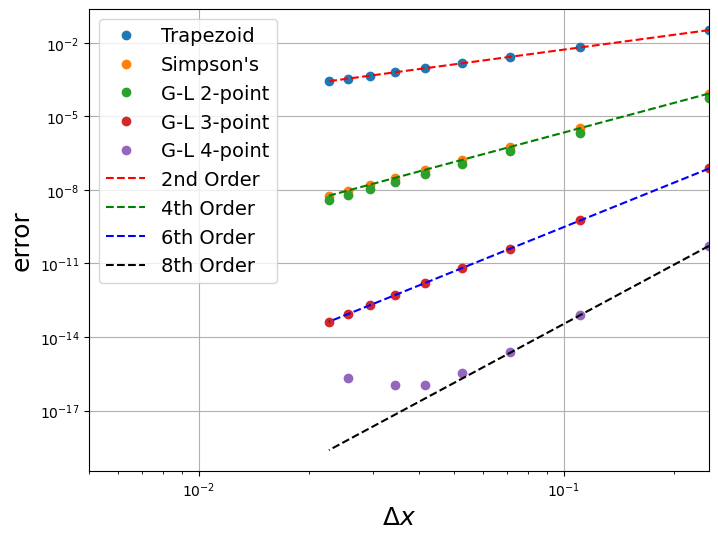

In [34]:
# Compute the error as a function of delta_x for each method
f = lambda x: numpy.sin(numpy.pi * x)
I = 2.0 / numpy.pi

# num_partitions = range(50, 1000, 50)
num_partitions = range(5, 50, 5)
delta_x = numpy.empty(len(num_partitions))
error_trap = numpy.empty(len(num_partitions))
error_simpson = numpy.empty(len(num_partitions))
error_2 = numpy.empty(len(num_partitions))
error_3 = numpy.empty(len(num_partitions))
error_4 = numpy.empty(len(num_partitions))

for (j, N) in enumerate(num_partitions):
    x_hat = numpy.linspace(0.0, 1.0, N)
    delta_x[j] = x_hat[1] - x_hat[0]
    
    # Compute trapezoid
    I_hat = 0.0
    for i in range(0, N - 1):
        I_hat += (f(x_hat[i + 1]) + f(x_hat[i])) * delta_x[j] / 2.0
    error_trap[j] = numpy.abs(I_hat - I)
    
    # Compute simpson's    
    I_hat = 0.0
    for i in range(0, N - 1):
        I_hat += delta_x[j] * (1.0 / 6.0 * (f(x_hat[i]) + f(x_hat[i+1])) + 2.0 / 3.0 * f(x_hat[i] + delta_x[j] / 2.0))
    error_simpson[j] = numpy.abs(I_hat - I)
    
    # Compute Gauss-Legendre 2-point
    xi_map = lambda a,b,xi : (b - a) / 2.0 * xi + (a + b) / 2.0
    xi = [-numpy.sqrt(1.0 / 3.0), numpy.sqrt(1.0 / 3.0)]
    w = [1.0, 1.0]
    I_hat = 0.0
    for i in range(0, N - 1):
        for k in range(len(xi)):
            I_hat += f(xi_map(x_hat[i], x_hat[i+1], xi[k])) * w[k]
    I_hat *= delta_x[j] / 2.0
    error_2[j] = numpy.abs(I_hat - I)
    
    # Compute Gauss-Legendre 3-point
    xi_map = lambda a,b,xi : (b - a) / 2.0 * xi + (a + b) / 2.0
    xi = [-numpy.sqrt(3.0 / 5.0), 0.0, numpy.sqrt(3.0 / 5.0)]
    w = [5.0 / 9.0, 8.0 / 9.0, 5.0 / 9.0]
    I_hat = 0.0
    for i in range(0, N - 1):
        for k in range(len(xi)):
            I_hat += f(xi_map(x_hat[i], x_hat[i+1], xi[k])) * w[k]
    I_hat *= delta_x[j] / 2.0
    error_3[j] = numpy.abs(I_hat - I)
    
    # Compute Gauss-Legendre 4-point
    xi_map = lambda a,b,xi : (b - a) / 2.0 * xi + (a + b) / 2.0
    xi = [-numpy.sqrt(3.0 / 7.0 - 2.0 / 7.0 * numpy.sqrt(6.0 / 5.0)), 
           numpy.sqrt(3.0 / 7.0 - 2.0 / 7.0 * numpy.sqrt(6.0 / 5.0)),
          -numpy.sqrt(3.0 / 7.0 + 2.0 / 7.0 * numpy.sqrt(6.0 / 5.0)),
           numpy.sqrt(3.0 / 7.0 + 2.0 / 7.0 * numpy.sqrt(6.0 / 5.0))]
    w = [(18.0 + numpy.sqrt(30.0)) / 36.0, (18.0 + numpy.sqrt(30.0)) / 36.0,
         (18.0 - numpy.sqrt(30.0)) / 36.0, (18.0 - numpy.sqrt(30.0)) / 36.0]
    I_hat = 0.0
    for i in range(0, N - 1):
        for k in range(len(xi)):
            I_hat += f(xi_map(x_hat[i], x_hat[i+1], xi[k])) * w[k]
    I_hat *= delta_x[j] / 2.0
    error_4[j] = numpy.abs(I_hat - I)
    
fig = plt.figure(figsize=(8, 6))
axes = fig.add_subplot(1, 1, 1)

# axes.plot(delta_x, error)
axes.loglog(delta_x, error_trap, 'o', label="Trapezoid")
axes.loglog(delta_x, error_simpson, 'o', label="Simpson's")
axes.loglog(delta_x, error_2, 'o', label="G-L 2-point")
axes.loglog(delta_x, error_3, 'o', label="G-L 3-point")
axes.loglog(delta_x, error_4, 'o', label="G-L 4-point")

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))
axes.loglog(delta_x, order_C(delta_x[0], error_trap[0], 2.0) * delta_x**2.0, 'r--', label="2nd Order")
axes.loglog(delta_x, order_C(delta_x[0], error_simpson[0], 4.0) * delta_x**4.0, 'g--', label="4th Order")
axes.loglog(delta_x, order_C(delta_x[1], error_3[1], 6) * delta_x**6, 'b--', label="6th Order")
axes.loglog(delta_x, order_C(delta_x[1], error_4[1], 8.0) * delta_x**8.0, 'k--', label="8th Order")

axes.legend(loc='best',fontsize=14)
axes.set_xlabel('$\Delta x$', fontsize=18)
axes.set_ylabel('error', fontsize=18)
axes.set_xlim((5e-3, delta_x[0]))
axes.grid()

plt.show()

#### Other Quadrature Families

 - Clenshaw-Curtis (Gauss-Chebyshev): If $w(x) = \frac{1}{\sqrt{1 - x^2}}$ and $g(x)$ are Chebyshev polynomials then we know the roots of the polynomials to be $x_i = \cos\left(\frac{2i-1}{2N} \pi \right)$ (the Chebyshev nodes) and we can derive that $w_i = \frac{\pi}{N}$.
 - Gauss-Hermite:  If $w(x) = e^{-x^2}$ and $g(x)$ are Hermite polynomials $H_i(x)$ then
   $$w_i = \frac{2^{N-1} N! \sqrt{\pi}}{N^2 (H_{N-1}(x_i))^2}$$

## SciPy Integration Routines

SciPy has a number of integration routines that we have derived here including general purpose integrators that can control error.  For more information see [scipy.integrate](https://docs.scipy.org/doc/scipy/reference/integrate.html)

In [ ]:
import scipy.integrate as integrate
# integrate?